In [1]:
%%html
<script>
(function() {
  // Create the toggle button
  const rtlButton = document.createElement("button");
  rtlButton.textContent = "Toggle LTR";
  rtlButton.id = "top-rtl-toggle";
  rtlButton.style.marginLeft = "8px";
  rtlButton.style.padding = "4px 10px";
  rtlButton.style.fontSize = "14px";
  rtlButton.style.cursor = "pointer";

  // State
  var rtlActive = false;

  // Styling function
  var applyStyleToEditor = (editor) => {
    if (!editor) return;
    var direction = getComputedStyle(editor).getPropertyValue('direction')=='rtl' ? 'ltr' : 'rtl';
    var text_align = getComputedStyle(editor).getPropertyValue('text-align')=='right' ? 'left' : 'right';
    editor.style.setProperty('direction', direction, 'important');
    editor.style.setProperty('text-align', text_align, 'important');
  };

  // Toggle logic
  rtlButton.onclick = () => {
    rtlActive = !rtlActive;
    rtlButton.textContent = rtlActive ? "Toggle LTR" : "Toggle RTL";
    document.querySelectorAll('.jp-MarkdownCell .jp-InputArea-editor').forEach(applyStyleToEditor);
    document.querySelectorAll('.jp-RenderedHTMLCommon code, .jp-RenderedHTMLCommon code span').forEach(applyStyleToEditor);
    document.querySelectorAll('jp-RenderedHTMLCommon, .jp-RenderedHTMLCommon *').forEach(applyStyleToEditor);
  };

  // Watch for focus into editing Markdown cells
  // document.addEventListener('focusin', (event) => {
  //   const editor = event.target.closest('.jp-MarkdownCell .jp-InputArea-editor');
  //    if (editor) applyStyleToEditor(editor);
  // });

  // Insert into top toolbar if not already present
  var insertIntoToolbar = () => {
    const toolbar = document.querySelector('.jp-NotebookPanel-toolbar');
    if (toolbar && !document.getElementById("top-rtl-toggle")) {
      toolbar.appendChild(rtlButton);
    } else {
      // Try again in a moment if toolbar isn't ready yet
      setTimeout(insertIntoToolbar, 300);
    }
  };

  insertIntoToolbar();
})();
</script>

In [2]:
%%html
<!-- <style>
  table {display: inline-block}
</style> -->


# פונקציות

### אג'נדה
- מהן פונקציות ולמה כדאי להשתמש בהן.
- פונקציות מובנות של פייתון
- מימוש פונקציות בעצמכם

עד עכשיו פגשנו פונקציות "מוכנות מראש" - כמו `len` ו-`type`, שעובדות על מגוון טיפוסי נתונים, ומתודות של מחרוזות כמו `find` ו`lower`. ראינו איך הן מקבלות ערך (למשל המחרוזת) ומחזירות תוצאה (כמו מספר או מחרוזת אחרת). אבל מה קורה אם אנחנו רוצים לבצע פעולה שאין לה פונקציה מוכנה? בדיוק בשביל זה נלמד איך לכתוב פונקציות משלנו: נבין איך מגדירים אותן, איך משתמשים בהן, ואיך גורמים להן להחזיר תוצאה שנוכל להשתמש בה בהמשך הקוד.

```{admonition} **שימו לב**
:class: error

בסרטון הקרוב מוזכרת המילה "רשימה" - זהו שם של טיפוס נתונים חדש שעדיין לא למדנו.
אל דאגה! נלמד על רשימות ממש בקרוב. כרגע כל מה שצריך הוא להבין את הרעיון של פונקציות.
```

In [3]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/zSpwiy63qAE?si=ktisCRum6tLqjGq5" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

## מהי פונקציה?
הגדרה: פונקציה היא רצף פקודות עם שם, שמבצע משימה מסוימת – באופן עצמאי משאר הקוד.

לפונקציה יש שני מרכיבים מרכזיים: **קלט** (Input) ו**פלט** (Output). ה**קלט** מורכב מערכים שהפונקציה מקבלת כדי לבצע את המשימה שלה (נקראים גם פרמטרים - Parameters או ארגומנטים - Arguments), וה**פלט** הוא התוצאה שהפונקציה מחזירה בחזרה. במילים אחרות, אנחנו “מזינים” לפונקציה נתונים, והיא מעבדת אותם ומחזירה לנו תשובה בהתאם.

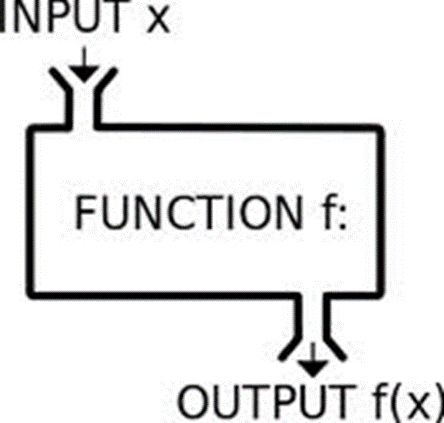

In [4]:
import json
from jupyterquiz import display_quiz
example = \
'''
   [{
        "question": "מה סוג הקלט של הפונקציה len?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "int",
                "correct": false,
                "feedback": "לא נכון"
            },
            {
                "answer": "מחרוזת",
                "correct": true,
                "feedback": "נכון!"
            },
            {
                "answer": "אורך המחרוזת",
                "correct": false,
                "feedback": "לא נכון"
            }
        ]
    }]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

<IPython.core.display.Javascript object>

In [5]:
import json
from jupyterquiz import display_quiz
example = \
'''
   [{
        "question": "מה סוג הפלט של הפונקציה len?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "מחרוזת",
                "correct": false,
                "feedback": "לא נכון"
            },
            {
                "answer": "int",
                "correct": true,
                "feedback": "נכון!"
            },
            {
                "answer": "אורך המחרוזת",
                "correct": false,
                "feedback": "לא נכון"
            }
        ]
    }]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

<IPython.core.display.Javascript object>

## אז למה צריך פונקציות בכלל?

#### איך נחשב את ההיקף של שלושה מלבנים?

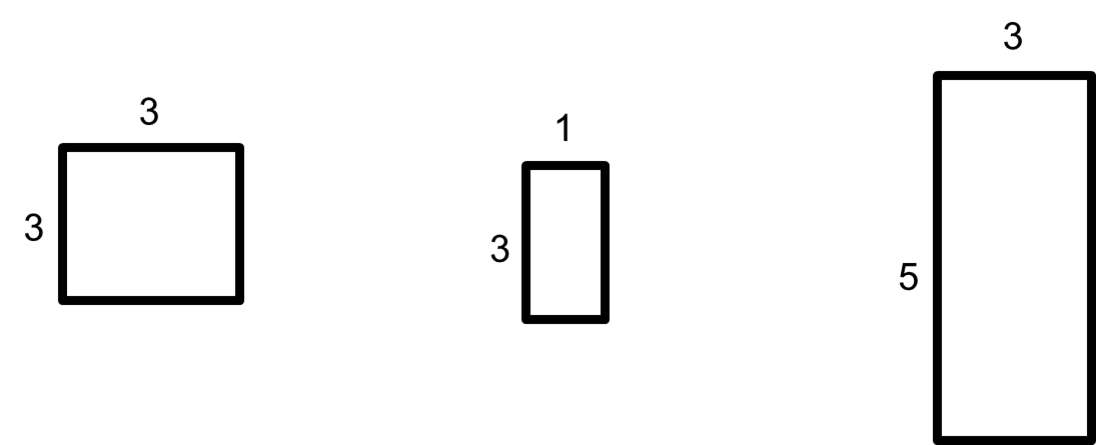

In [6]:
c1=3*2+3*2
print(c1)
c2=1*2+3*2
print(c2)
c3=3*2+5*2
print(c3)

12
8
16


עכשיו שנו את הקוד כדי לחשב את **שטח** המלבנים.

In [7]:
example = \
'''
   [{
    
        "question": "כמה שורות קוד נדרשת לשנות?",
        "type": "numeric",
        "answers": [
            {
                "type": "value",
                "value": 3,
                "correct": true,
                "feedback": "נכון!"
            },
            {
                "type": "default",
                "feedback": "לא נכון"
            }
        ]
    }]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

<IPython.core.display.Javascript object>

### בעיה ראשונה - כפילות בקוד

כפילות בקוד היא אחת הבעיות הנפוצות ביותר בתכנות. כאשר אנחנו כותבים שוב ושוב את אותו מקטע קוד, כל שינוי או תיקון באג דורש מאיתנו לעבור על כל ההעתקים, מה שמעלה את הסיכון לטעויות. בנוסף, הקוד נעשה ארוך, מסורבל וקשה לתחזוקה. 

הפתרון הוא לרכז את הלוגיקה שחוזרת על עצמה בתוך פונקציה – כך כותבים את הקוד פעם אחת בלבד, ומשתמשים בו בכל מקום שבו נדרש.

### למה פונקציות?  
פונקציות הן אחד הכלים המרכזיים בתכנות מודרני. הן מאפשרות לנו לכתוב קוד יעיל, מסודר וקל לתחזוקה. כמעט כל תוכנית רצינית מורכבת מעשרות עד מאות פונקציות. 
פונקציות מאפשרות לנו:
- מודולריות – נחלק את המשימה הגדולה למשימות קטנות, שכל אחת מהן פותרת בעיה קלה יותר. זה לדוגמה מאפשר עבודה בצוות - כל אחד עובד חלק מהפונקציות. 
- הפשטה – ברגע שיש לי פונקציה מוכנה, אפשר להשתמש בה כ"קופסה שחורה" ולהשתמש בה בלי לזכור או לדעת איך היא עובדת. אתם לדוגמה השתמשתם בפונקציה int() שיודעת להמיר מחרוזת או float לint. אבל אתם לא צריכים לדעת איך היא עושה זאת כדי להשתמש בה.
- תחזוקה – אם גיליתם טעות (באג) בקוד שלכם, תוכלו לתקן אותה במקום אחד, והם משפיעים אוטומטית על כל השימושים בפונקציה. 
- קריאות – הקוד הראשי נשאר קצר וברור, ומציג את זרימת הלוגיקה בצורה מובנת.
- טווח משתנים מוגבל – משתנים פנימיים של הפונקציה אינם מתערבבים עם שאר הקוד, מה שמפחית שגיאות. לנקודה זו נתייחס מאוחר יותר בקורס.
